<a href="https://colab.research.google.com/github/Naitik582/FUTURE_DS_02/blob/main/Customer_Support_Data_Analysis_%26_Tickets_Solutions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
from google.colab import files
uploaded = files.upload()

Saving customer_support_tickets.csv to customer_support_tickets (3).csv


In [38]:
import pandas as pd

# Load your file
df = pd.read_csv("customer_support_tickets.csv")

# Preview first 2 rows
df.head(2)

,Ticket ID,Customer Name,Customer Email,Customer Age,Customer Gender,Product Purchased,Date of Purchase,Ticket Type,Ticket Subject,Ticket Description,Ticket Status,Resolution,Ticket Priority,Ticket Channel,First Response Time,Time to Resolution,Customer Satisfaction Rating
0,1,Marisa Obrien,carrollallison@example.com,32,Other,GoPro Hero,2021-03-22,Technical issue,Product setup,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Social media,2023-06-01 12:15:36,NaN,NaN
1,2,Jessica Rios,clarkeashley@example.com,42,Female,LG Smart TV,2021-05-22,Technical issue,Peripheral compatibility,I'm having an issue with the {product_purchase...,Pending Customer Response,NaN,Critical,Chat,2023-06-01 16:45:38,NaN,NaN


In [39]:
# Replace {product_purchased} with actual product names
df['Ticket Description'] = df.apply(
    lambda row: str(row['Ticket Description']).replace("{product_purchased}", row['Product Purchased']),
    axis=1
)

In [40]:
# Convert time columns to datetime
df['First Response Time'] = pd.to_datetime(df['First Response Time'], errors='coerce')
df['Time to Resolution'] = pd.to_datetime(df['Time to Resolution'], errors='coerce')

# Calculate resolution time in hours
df['Resolution Time (Hrs)'] = (df['Time to Resolution'] - df['First Response Time']).dt.total_seconds() / 3600

In [41]:
# Check missing values
df.isnull().sum()

,0
Ticket ID,0
Customer Name,0
Customer Email,0
Customer Age,0
Customer Gender,0
Product Purchased,0
Date of Purchase,0
Ticket Type,0
Ticket Subject,0
Ticket Description,0


In [42]:
# Find top 5 ticket subjects
df['Ticket Subject'].value_counts().head(5)

,count
Ticket Subject,
Refund request,576
Software bug,574
Product compatibility,567
Delivery problem,561
Hardware issue,547


In [43]:
# Average time in hours to resolve a ticket
df['Resolution Time (Hrs)'].mean()

np.float64(-0.05770434573251475)

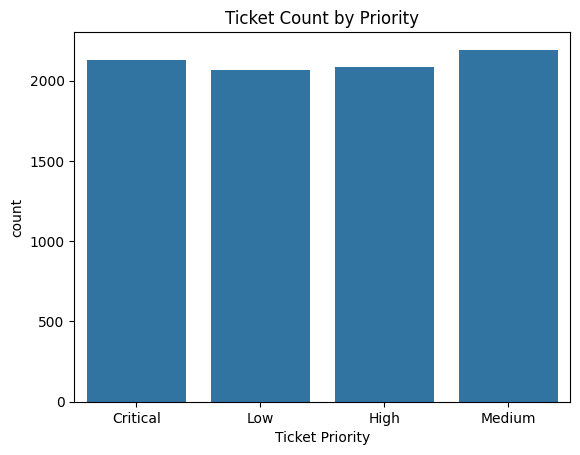

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize ticket priorities
sns.countplot(data=df, x='Ticket Priority')
plt.title("Ticket Count by Priority")
plt.show()

In [45]:
print("----- SUMMARY REPORT -----")
print("\nTop 5 Common Issues:")
print(df['Ticket Subject'].value_counts().head(5))

print("\nAverage Resolution Time (Hrs):", round(df['Resolution Time (Hrs)'].mean(), 2))

print("\nRecommendations:")
print("- Automate replies for top issues.")
print("- Prioritize 'Critical' tickets with auto-escalation.")
print("- Improve documentation for 'Product setup' and 'Peripheral compatibility'.")

----- SUMMARY REPORT -----

Top 5 Common Issues:
Ticket Subject
Refund request           576
Software bug             574
Product compatibility    567
Delivery problem         561
Hardware issue           547
Name: count, dtype: int64

Average Resolution Time (Hrs): -0.06

Recommendations:
- Automate replies for top issues.
- Prioritize 'Critical' tickets with auto-escalation.
- Improve documentation for 'Product setup' and 'Peripheral compatibility'.
